In [1]:
import pandas as pd
df=pd.read_csv('c:/data/coin/market-price.csv',index_col=0)
df

,market-price
Timestamp,
2021-10-18 00:00:00,61546.21
2021-10-19 00:00:00,61971.59
2021-10-20 00:00:00,64287.64
2021-10-21 00:00:00,66063.56
2021-10-22 00:00:00,62354.86
...,...
2021-12-13 00:00:00,50117.25
2021-12-14 00:00:00,46757.09
2021-12-15 00:00:00,48392.79


<AxesSubplot:xlabel='Timestamp'>

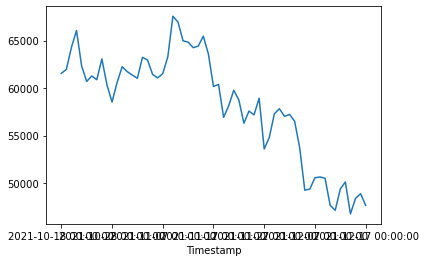

In [3]:
df['market-price'].plot()

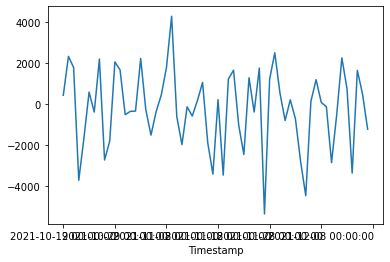

In [4]:
import matplotlib.pyplot as plt
diff1=df['market-price'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

diff1=np.log(df['market-price']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print(result[0])
print(result[1])

(-7.655575803936232, 1.7426891889269193e-11, 1, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, -187.76931840945872)
-7.655575803936232
1.7426891889269193e-11


In [6]:
from pmdarima.arima import auto_arima
model=auto_arima(df['market-price'],suppress_warnings=True)
model

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
n=int(df.shape[0]*0.8)
train=df[:n]
test=df[n:]

In [10]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['market-price'],order=(0,1,0)).fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [11]:
fore=model.forecast(steps=5)
print(fore)

(array([53547.19382979, 53380.54765957, 53213.90148936, 53047.25531915,
       52880.60914894]), array([1907.09090316, 2697.03381993, 3303.17833893, 3814.18180632,
       4264.38489874]), array([[49809.36434435, 57285.02331523],
       [48094.45850743, 58666.63681172],
       [46739.79091055, 59688.01206817],
       [45571.59634827, 60522.91429003],
       [44522.56833119, 61238.64996668]]))


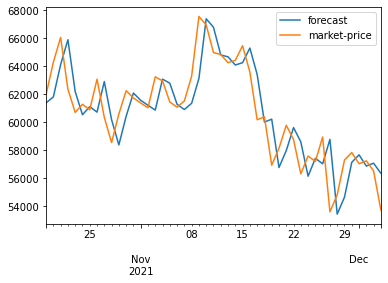

In [12]:
model.plot_predict()
plt.show()

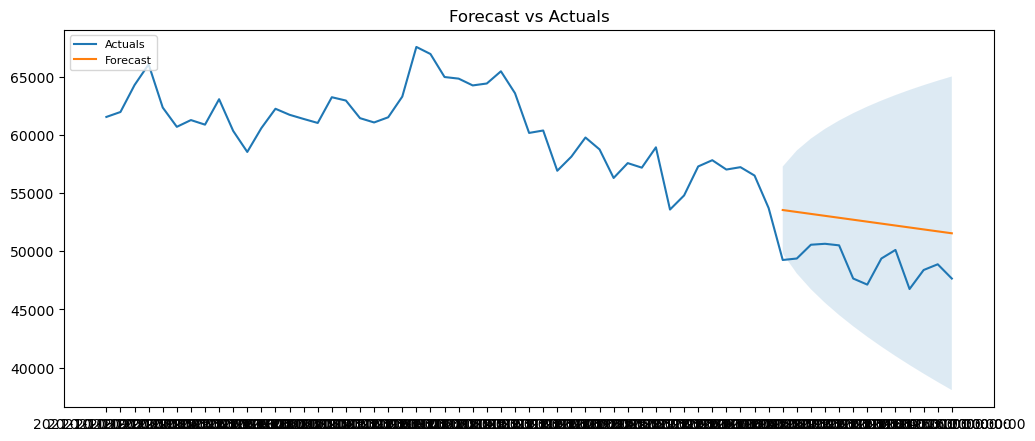

In [13]:
fc, se, conf = model.forecast(steps=len(test))
fc_series = pd.Series(fc,index=test.index)
lower = pd.Series(conf[:, 0],index=test.index)
upper = pd.Series(conf[:, 1],index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['market-price'], label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()